In [1]:
from autoscope import Autoscope
from time import sleep
import picamera
from IPython.display import Image 
camera = picamera.PiCamera()

In [2]:
scope = Autoscope([12, 16, 20, 21], [6, 13, 19, 26], [17, 22, 23, 24])

(0, 0, -1790)


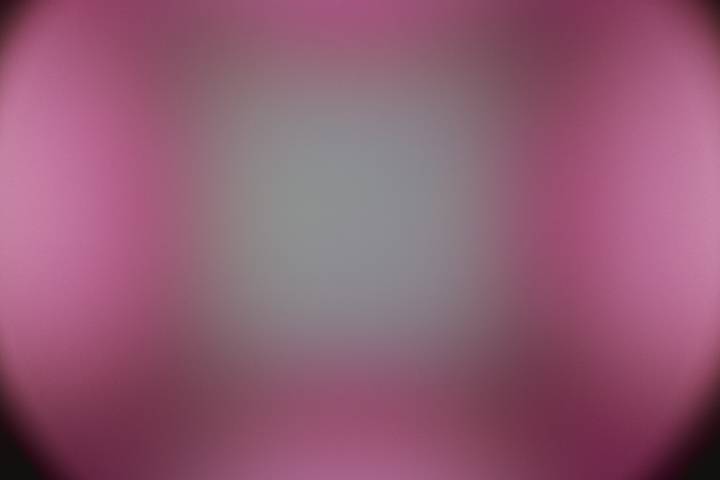

In [34]:
scope.focus.down(250)
take_photo(camera)
print(scope.coordinates)
Image(filename='data/test.jpg')

In [36]:
take_photo(camera)

Image(filename='data/test.jpg')

TypeError: 'PiResolution' object is not callable

/home/pi/auto-scope/autoscope/core.py:14: RuntimeWarning: This channel is already in use, continuing anyway.  Use GPIO.setwarnings(False) to disable warnings.
  GPIO.setup(pin,GPIO.OUT)


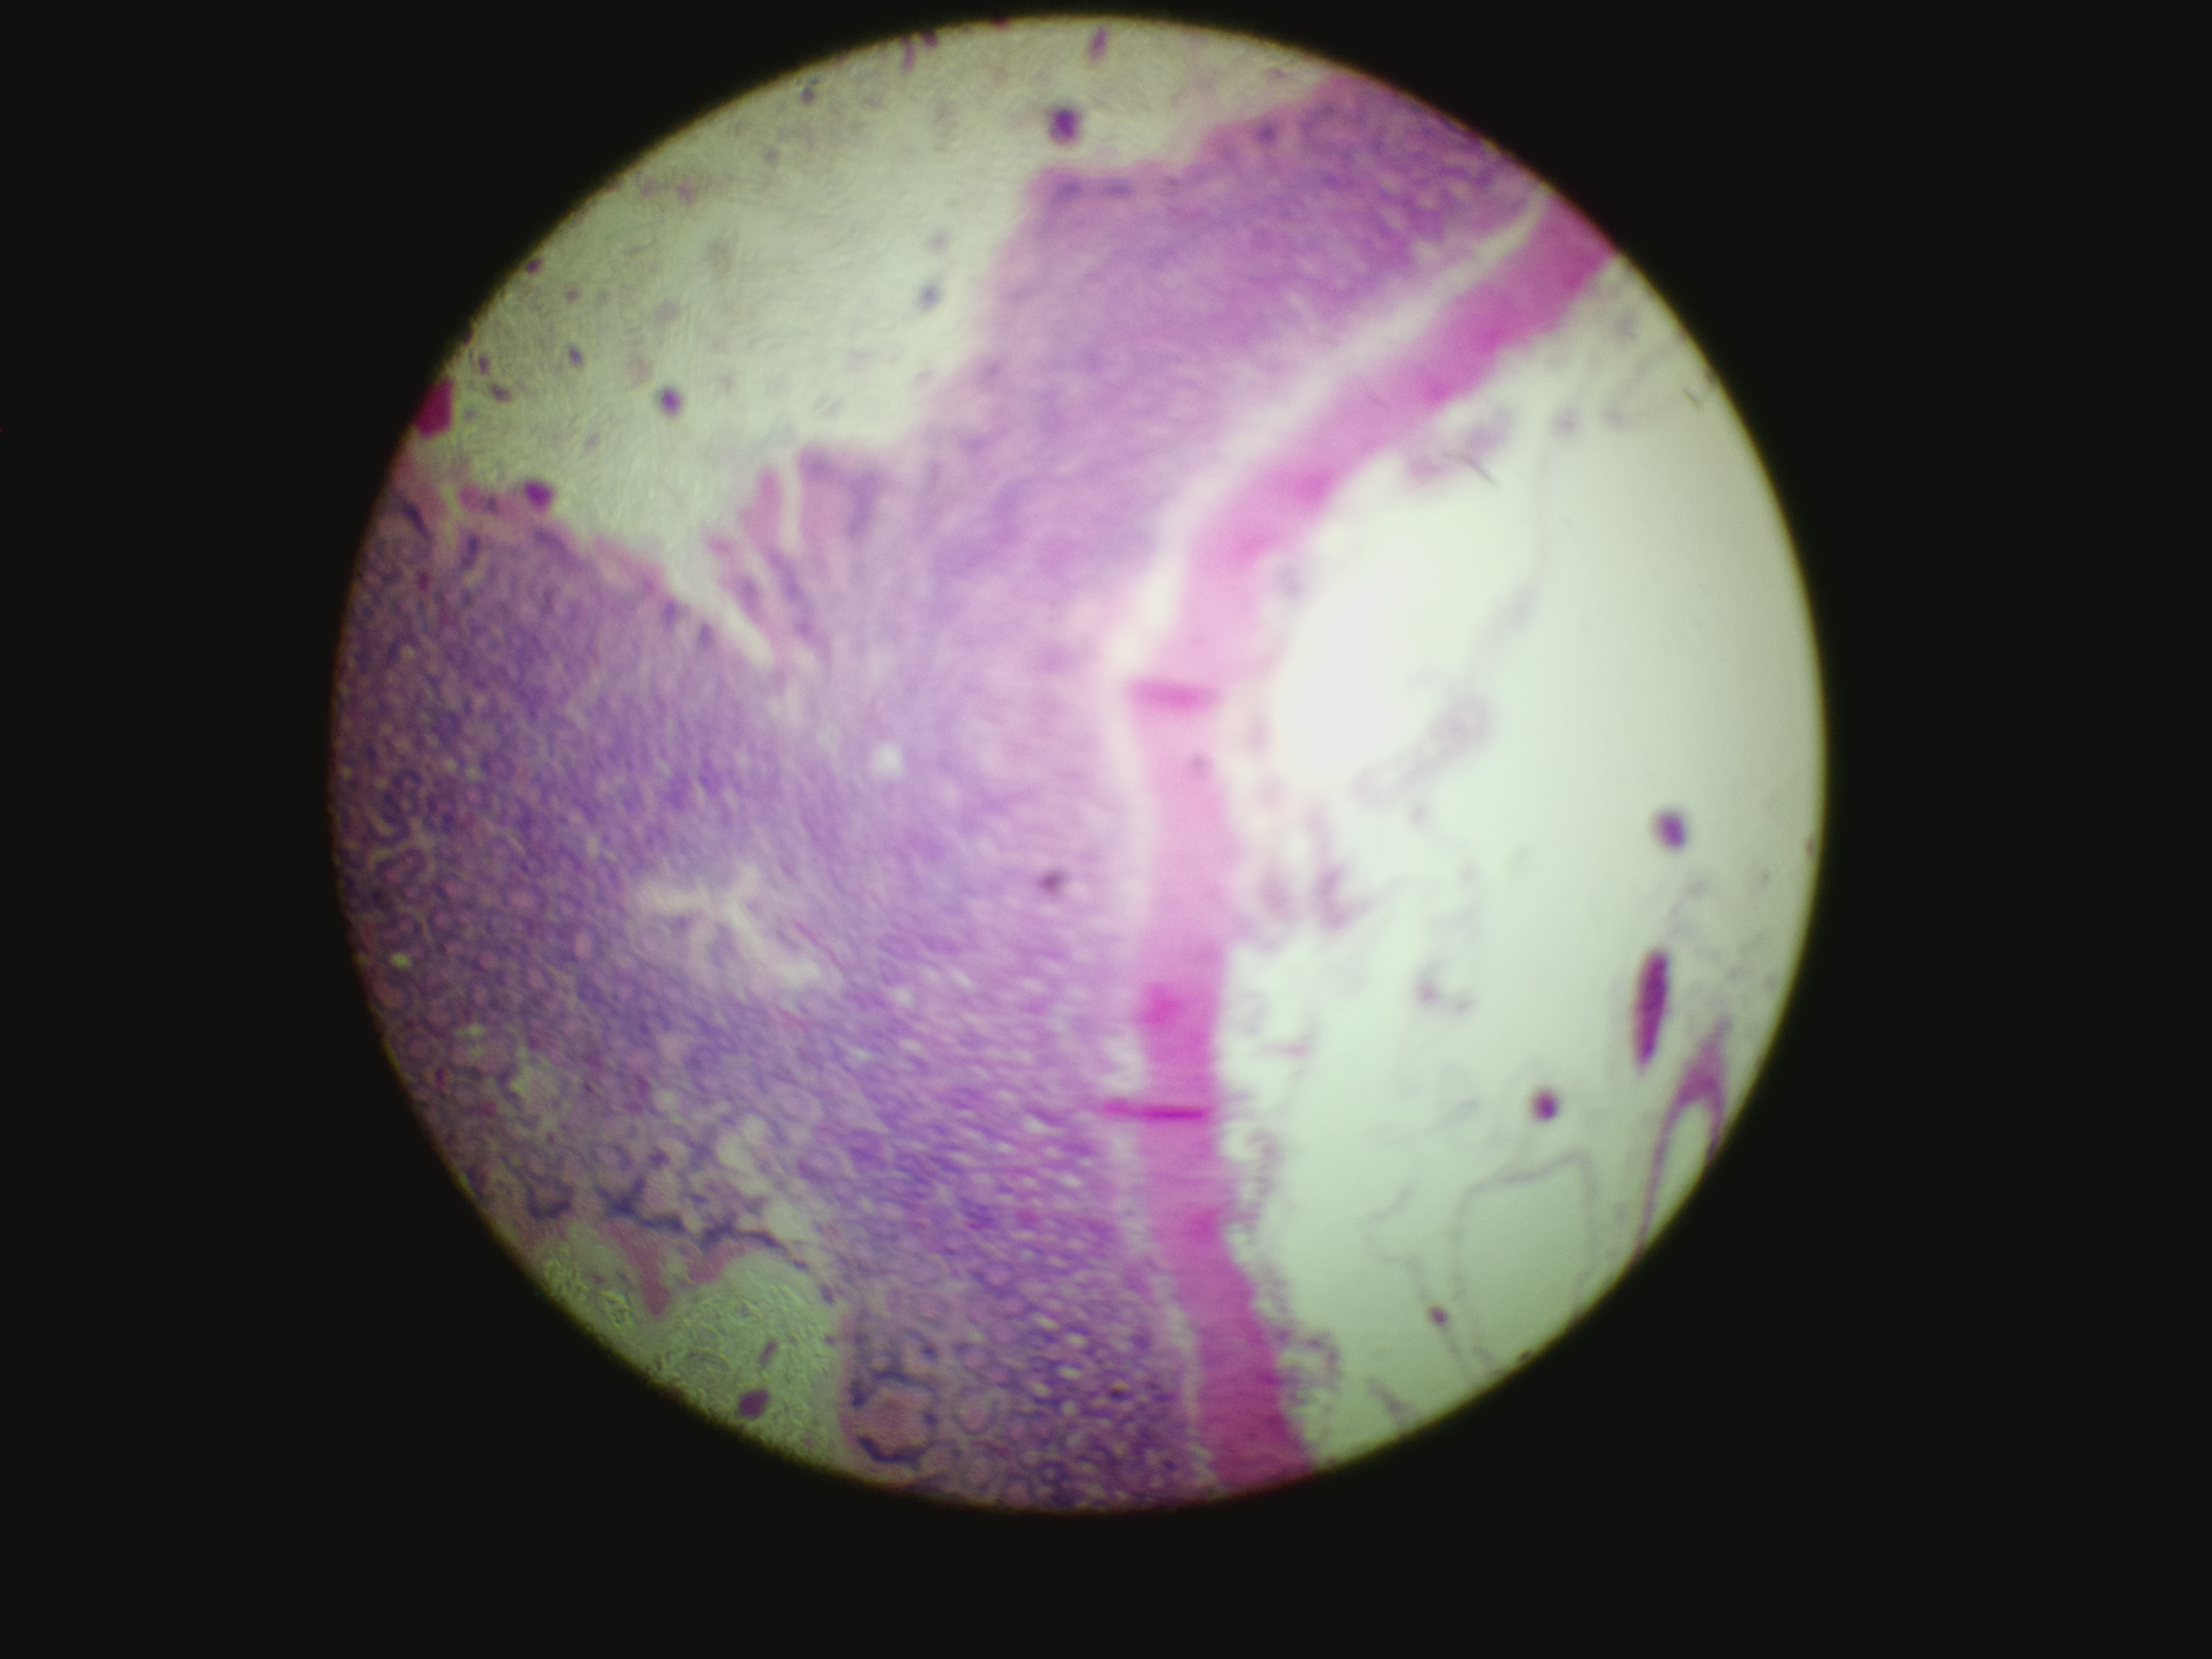

In [132]:
take_photo(camera)
scope.focus.step_z(-50)
Image(filename='data/test.jpg')

In [14]:
from io import BytesIO
from time import sleep
import picamera
import picamera.array
import cv2

ImportError: libhdf5_serial.so.100: cannot open shared object file: No such file or directory

In [10]:
output.array.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [2]:
def take_photo(camera, resolution=(1024, 768)):
    # Create the in-memory stream
    stream = BytesIO()
    camera = PiCamera()
    camera.resolution = resolution
    sleep(2)
    camera.capture(stream, format='jpeg')
    # "Rewind" the stream to the beginning so we can read its content
    stream.seek(0)
    return Image.open(stream)

def generate_images_down_range(step_size, limit):
    """This needs a better name!"""
    max_pos = scope.focus.zpox - abs(limit)
    while scope.focus.zpox > max_pos:
        yield take_photo(camera)
        scope.focus.down(step_size)
    
scope.focus.set_home()
for img in generate_images_down_range(10, 1000):
    imshow(np.asarray(pil_im))
scope.focus.home()

ModuleNotFoundError: No module named 'matplotlib'

In [4]:


import time
for _ in range(10):
    scope.focus.down(50)
    time.sleep(1)
    scope.focus.up(50)
    time.sleep(1)

/home/pi/auto-scope/autoscope/core.py:14: RuntimeWarning: This channel is already in use, continuing anyway.  Use GPIO.setwarnings(False) to disable warnings.
  GPIO.setup(pin,GPIO.OUT)


In [8]:
for _ in range(10):
    scope.stage.left(100)
    time.sleep(1)
    scope.stage.right(100)
    time.sleep(1)

In [5]:
scope.focus.up(1)

0
1
2
3
4
5
6
7


In [122]:
scope.stage.left(50)

In [13]:
!sudo pip install matplotlib numpy

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple
  Using cached https://files.pythonhosted.org/packages/ec/06/def4fb2620cbe671ba0cb6462cbd8653fbffa4acd87d6d572659e7c71c13/matplotlib-3.0.0.tar.gz
^C


In [6]:
!python -V

Python 2.7.9


In [10]:
__IPYTHON__

True

In [14]:
import cv2

ModuleNotFoundError: No module named 'cv2'

In [15]:
ls

autoscope/            autoscope.py  motor testing.ipynb  Pipfile.lock  setup.py
auto_scope.egg-info/  images/       Pipfile              README.md     tests/


In [16]:
!sudo dpkg --get-selections | grep opencv

libopencv-calib3d2.4:armhf			install
libopencv-contrib2.4:armhf			install
libopencv-core2.4:armhf				install
libopencv-features2d2.4:armhf			install
libopencv-flann2.4:armhf			install
libopencv-highgui2.4:armhf			install
libopencv-imgproc2.4:armhf			install
libopencv-legacy2.4:armhf			install
libopencv-ml2.4:armhf				install
libopencv-objdetect2.4:armhf			install
libopencv-video2.4:armhf			install


In [4]:
import sys
sys.os_name

AttributeError: module 'sys' has no attribute 'os_name'

In [5]:
import os 
os.name

'posix'

In [11]:
import platform
platform.version()

'#1149 SMP Mon Oct 8 17:39:42 BST 2018'

In [12]:
platform.machine()

'armv7l'